# Exito 🥇 o fracaso 📉 de un videojuego
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026. 

# Propósito y objetivos del análisis

El objetivo de este análisis es analizar el conjunto de datos y determinar e identificar patrones determinantes en el éxito o fracaso de un videojuego. ¿Cómo haremos esto? Primero deberé procesar los datos, limpiarlos. Tratar valores duplicados, ausentes, tipos de dato incorrecto, inconsistencias en las columnas, etc. 

El siguiente paso es analizar los datos, observaremos como varian las ventas dependiendo de distintos factores, crearemos visualizaciones para entender la distribución y dispersión de nuestros datos, identificaremos puntos importantes como los juegos más vendidos, plataformas lideres, etc. , también aplicaremos métodos estadísticos para saber si hay relaciones y comenzar a identificar patrones, filtraremos los datos por región, entre otras cosas. Por ultimo realizaremos distintas pruebas de hipótesis para verificar y obtener evidencia suficiente a cerca de lo que creemos de los datos.

El último paso consiste en presentar las conclusiones finales y determinar que cosas influyen en el éxito o fracaso de un videojuego.

# Descripción de los datos
Descripción de datos

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

## Inicialización.

In [1]:
#Para comenzar voy a importar las librerías.
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import numpy as np

In [2]:
#Ahora vamos a cargar los datos.
video_games = pd.read_csv('../Data/games.csv')

In [3]:
#Visualizamos la información general.
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
video_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


En las celdas de arriba podemos ver la información general del DataFrame con el que estaremos trabajando, el DF consta de 16715 entradas, con 11 columnas que representan características o información de un videojuego en específico, la información incluye el nombre del juego, año de lanzamiento, plataforma, genero, ventas, calificación, entre otros. 
En cuanto a la calidad de los datos, los nombres de las columnas no están estandarizadas, la mayoría de columnas tienen valores ausentes, en algunos casos estos valores son relativamente pocos, pero por lo menos en 3 columnas el número de valores ausentes es significativo. Los tipos de datos parecen correctos, a excepción del año que debería ser entero, la calificación de la critica también y la calificacion de los usuarios. Tenemos información tanto cualitativa como cuantitativa, podremos realizar un análisis bastante completo con lo que tenemos, pero antes hay que procesar los datos.

# Limpieza y procesamiento de datos.

In [5]:
#Para comenzar cambiamos los nombres de las columnas a minúsculas, ya están en snake case y no tienen espacios innecesarios.
new_cols = []
for col in video_games.columns:
    col_lower = col.lower()
    new_cols.append(col_lower)
video_games.columns = new_cols
video_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Valores duplicados

In [6]:
#Vamos a verificar filas enteras duplicadas.
video_games.duplicated().sum()

0

In [7]:
#Vamos a comprobar valores duplicados en las columnas name y platform, si hay valores duplicados en la columna name solamente
# puede deberse a que existe el mismo juego para distintas plataformas, en cambio, el nombre y plataforma no pueden estar duplicados a 
# la vez.
video_games.duplicated(subset=['name','platform']).sum()

5

In [8]:
#Vamos a mostrar las filas de arriba que tienen esos valores duplicados.
video_games[video_games.duplicated(subset=['name','platform'])]
#Estos duplicados en name y platform indican que quiza el juego fue remasterizado y se lanzó en distintos años.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [9]:
#Vamos a comprobar duplicados en las primeras 3 columnas, se supone que no debería haber duplicados.
video_games.duplicated(subset=['name','platform', 'year_of_release']).sum()
#Como aun hay dos, estos son duplicados implicitos y son errores, los voy a eliminar a continuación.

2

In [10]:
#Eliminamos estas dos filas y comprobamos el resultado.
video_games.drop_duplicates(subset = ['name','platform', 'year_of_release'], inplace = True)
video_games.shape

(16713, 11)

## Valores ausentes.

In [11]:
#Hagamos un conteo de valores nulos por columna.
video_games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [12]:
#Voy a rellenar los valores ausentes de la columna year_of_release con 0 porque el año 0 no existe y así sabemos.
median = video_games['year_of_release'].median()
video_games['year_of_release'] = video_games['year_of_release'].fillna(median).astype('int')
#También convertimos a entero.

In [13]:
#la columna user_score es de tipo string, debería ser numérica, vamos a mostrar los valores unicos para identificar el problema.
video_games['user_score'].unique()
#Podemos ver que contiene el string tbd que significa to be determined, esto es igual a un valor ausente, entonces vamos a convertirlo a
# nan

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
video_games.loc[video_games['user_score'] == 'tbd', 'user_score'] = np.nan
#Ahora podemos convertir la columna a tipo float.
video_games['user_score'] = video_games['user_score'].astype('float')
video_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [15]:
#Vamos a rellenar los valores ausentes de las columnas de texto con 'unknown'.
video_games['name'] = video_games['name'].fillna('unknown')
video_games['genre'] = video_games['genre'].fillna('unknown')
video_games['rating'] = video_games['rating'].fillna('unknown')

In [16]:
#comprobamos la salida.
video_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating                0
dtype: int64

Ahora solo nos quedan valores ausentes en la columna critic_score y user_score, voy conservar esos valores tal como están, para no alterar los valores que si tengo, las filas completas.
Para tratar los demás valores ausentes, rellenamos las columnas con valores ausentes de tipo string con el texto 'unknown', en la columna year_of_release los rellenamos con la mediana ya que son más de 16,000 filas y solo poco más de 200 valores ausentes, entonces son relativamente pocos. La mediana representa bien una estimación realista del año, después convertimos esta columna a tipo int. Conservamos los valores ausentes en las columnas critic_score y user_score. Los tipos de datos de cada columna ya están correctos.

## Ventas totales.

In [17]:
#Nuestro último paso del procesamiento de datos es crear una columna de ventas totales por juego.
video_games['total_sales'] = video_games['na_sales'] + video_games['eu_sales'] + video_games['jp_sales'] + video_games['other_sales']
video_games.head()
# Recordemos que las columnas de ventas representa millones de dolares es decir, si encontramos un 8, no quiere decir 8 dolares, sino 
# 8 millones de dolares, por ejemplo.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# Análisis de los datos.

<function matplotlib.pyplot.show(close=None, block=None)>

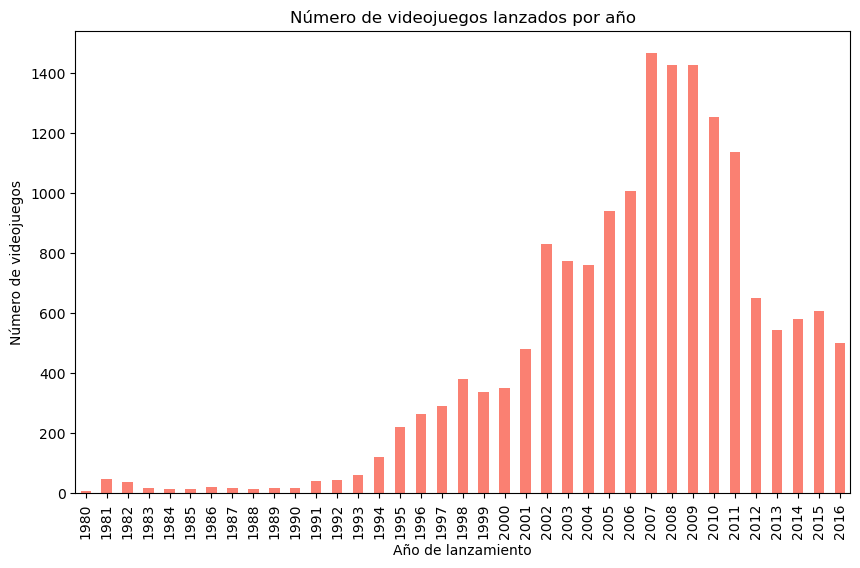

In [18]:
#Vamos a ver el número de videojuegos que se lanzaron por año.
releases_per_year = video_games.groupby('year_of_release')['name'].count()
releases_per_year.plot(kind = 'bar', 
                       title = 'Número de videojuegos lanzados por año', 
                       xlabel = 'Año de lanzamiento', 
                       ylabel = 'Número de videojuegos', 
                       color = 'salmon', 
                       figsize = (10, 6))
plt.show

Arriba podemos ver la cantidad de juegos que fueron lanzados en cada año, nosotros tenemos información en un rango de años desde 1980 hasta 2016, como era de esperarse, en la decada de los 80, el número de videojuegos que se estrenaban cada año era pequeño, a partir de 1991 este número comenzo a crecer constantemente, en un lapso de tiempo entre 2007 y 2011 el número de videojuegos vendidos alcanzó su pico llegando hasta más de 1400 juegos venidos anualmente. A partir del 2011 este número comenzó a disminuir significativamente.

<function matplotlib.pyplot.show(close=None, block=None)>

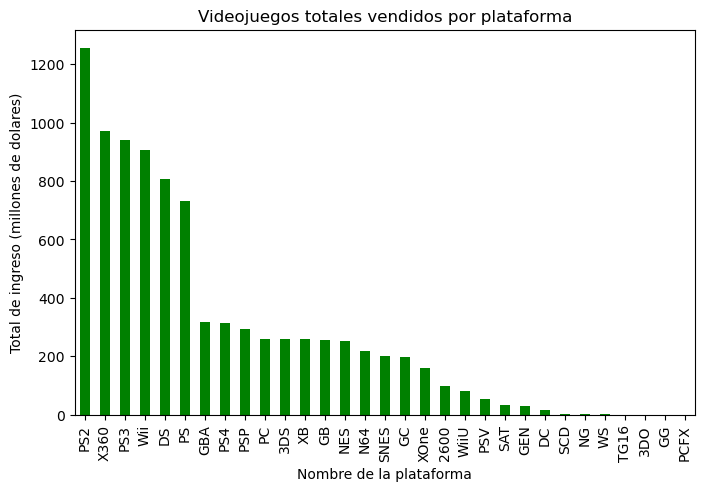

In [19]:
#Ahora vamos a observar las ventas por plataforma, seleccionaremos las 10 plataformas con más videojuegos vendidos.
sales_per_platform = video_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
sales_per_platform.plot(kind = 'bar', 
                        title = 'Videojuegos totales vendidos por plataforma', 
                        xlabel = 'Nombre de la plataforma', 
                        ylabel = 'Total de ingreso (millones de dolares)', 
                        figsize = (8,5), 
                        color = 'green')
plt.show

En la celda de arriba podemos ver las plataformas más populares, con base al total de ventas e ingresos generados. La más popular fue el PlayStation 2 que generó más de 1,200 millones de dolares, después con más de 200 millones menos fueron el Xbox 360, el PlayStation 3, el Wii y el nintendo DS, estos fueron las 5 plataformas más populares, generaron un ingreso total entre un rango de alrededor de 800 millones de dolares a 1200 millones de dolares aproximadamente. 

Vamos a selecciónar las 5 plataformas más populares.

In [20]:
#Las 5 plataformas más populares son: 1. PS2 2. X360 3. PS3 4. Wii 5. Nintendo DS
#Vamos a filtrar 5 DataFrames, uno para cada plataforma de estas más populares.
ps2 = video_games.query('platform == "PS2"')
x360 = video_games.query('platform == "X360"')
ps3 = video_games.query('platform == "PS3"')
wii = video_games.query('platform == "Wii"')
ds = video_games.query('platform == "DS"')

<function matplotlib.pyplot.show(close=None, block=None)>

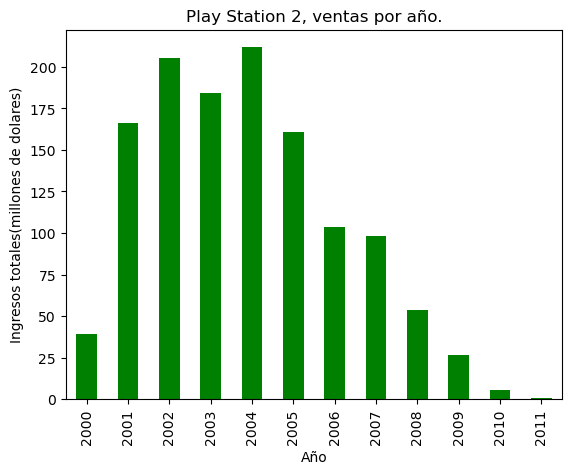

In [21]:
#A continuación vamos a crear una distribución de ventas por año para cada una de las top 5 plataformas.
ps2_sales = ps2.groupby('year_of_release')['total_sales'].sum()
ps2_sales.plot(kind = 'bar', 
               title = 'Play Station 2, ventas por año.', 
               xlabel = 'Año', 
               ylabel = 'Ingresos totales(millones de dolares)',
               color = 'green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

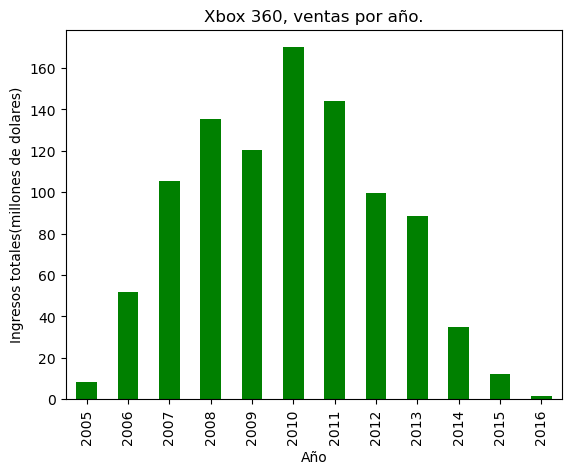

In [22]:
x360_sales = x360.groupby('year_of_release')['total_sales'].sum()
x360_sales.plot(kind = 'bar', 
               title = 'Xbox 360, ventas por año.', 
               xlabel = 'Año', 
               ylabel = 'Ingresos totales(millones de dolares)',
               color = 'green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

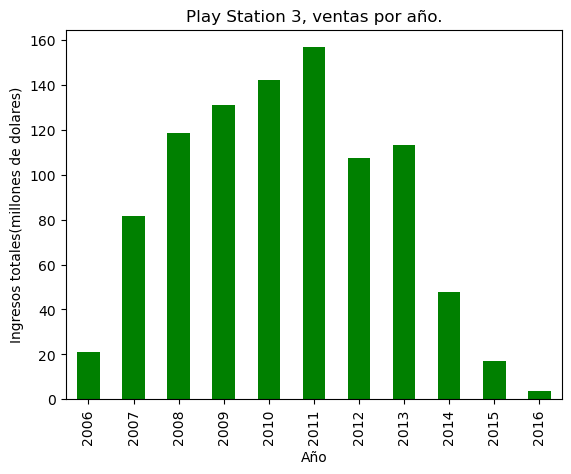

In [23]:
ps3_sales = ps3.groupby('year_of_release')['total_sales'].sum()
ps3_sales.plot(kind = 'bar', 
               title = 'Play Station 3, ventas por año.', 
               xlabel = 'Año', 
               ylabel = 'Ingresos totales(millones de dolares)',
               color = 'green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

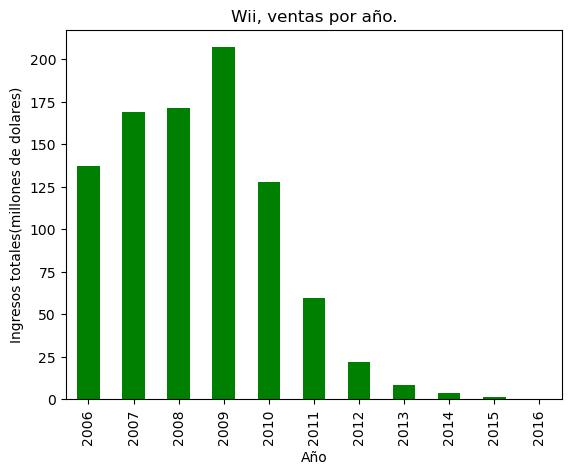

In [24]:
wii_sales = wii.groupby('year_of_release')['total_sales'].sum()
wii_sales.plot(kind = 'bar', 
               title = 'Wii, ventas por año.', 
               xlabel = 'Año', 
               ylabel = 'Ingresos totales(millones de dolares)',
               color = 'green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

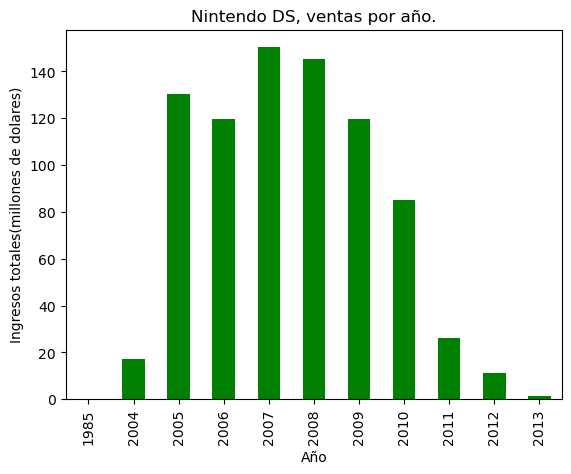

In [25]:
ds_sales = ds.groupby('year_of_release')['total_sales'].sum()
ds_sales.plot(kind = 'bar', 
               title = 'Nintendo DS, ventas por año.', 
               xlabel = 'Año', 
               ylabel = 'Ingresos totales(millones de dolares)',
               color = 'green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

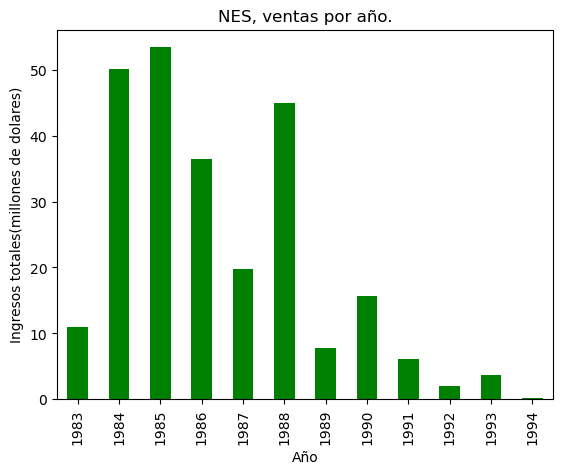

In [26]:
nes = video_games.query('platform == "NES"')
nes_sales = nes.groupby('year_of_release')['total_sales'].sum()
nes_sales.plot(kind = 'bar', 
               title = 'NES, ventas por año.', 
               xlabel = 'Año', 
               ylabel = 'Ingresos totales(millones de dolares)',
               color = 'green')
plt.show

En la celda de arriba mostramos la distribución de ventas por año separado en las 5 plataformas más populares, las gráficas comienzan en el año en que dicha plataforma se estreno y terminan en el ultimo año en el que tuvieron ventas, o terminan al llegar al año 2016 ya que nuestra información es hasta dicho año. Algo que me pareció muy interesante y vale la pena mencionar es que desde que comienza la "vida" de estas plataformas, hasta que termina, son en todos los casos 11 o 12 años, generalmente tienen su pico de ventas en los años intermedios, comienzan con ventas moderadas e incrementan considerablemente las ventas en años intermedios para después volver a disminuir. Esto responde a la pregunta **"¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?"**, diría que de 10 a 12 años, algunos motivos de esto es que las consolas o plataformas comienzan a volverse obsoletas, como es el caso del Play Station 2, si nuestra información tuviera casos más recientes, por ejemplo del Play Station 4 o 5, podríamos ver que probablemente las consolas más recientes son las que experimentan su pico de ventas, y conforme avanze el tiempo, sus ventas disminuiran. En la ultima celda realizé la misma distribución y gráfica para la consola NES que se estreno en el año de 1983 y como podemos ver y era de esperarse, su "vida de ventas" duro 12 años, con ciertos picos en los años intermedios y conforme avanzó el tiempo sus ventas fueron disminuyendo. 

## Filtrado de datos en base a los ultimos 9 años.

A partir de este momento, voy a filtrar el DataFrame para trabajar solo con los datos que considero importantes, voy a trabajar con datos del 2007 en adelante, porque? porque son los datos más recientes que tenemos, es información de los últimos 9 años, y otro punto que consideré esque como vimos en el análisis anterior, muchas plataformas tienen sus picos de venta a partir de años intermedios, alrededor de 5 a 7 años después de su lanzamiento, si nuestro objetivo es predecir información acerca del 2017 y tomamos datos desde el 2007, nuestro pico para las plataformas más recientes sería aproximadamente en esos años. También seleccioné ese periodo porque el 2007 es el año en el que el número de lanzamientos de videojuegos alcanza su pico.

In [27]:
video_games_filtered = video_games.query('year_of_release >= 2007')
video_games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9595 entries, 2 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9595 non-null   object 
 1   platform         9595 non-null   object 
 2   year_of_release  9595 non-null   int32  
 3   genre            9595 non-null   object 
 4   na_sales         9595 non-null   float64
 5   eu_sales         9595 non-null   float64
 6   jp_sales         9595 non-null   float64
 7   other_sales      9595 non-null   float64
 8   critic_score     4523 non-null   float64
 9   user_score       4529 non-null   float64
 10  rating           9595 non-null   object 
 11  total_sales      9595 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 937.0+ KB


En la celda de arriba podemos ver la información general del nuevo DF, tenemos al rededor de 9,600 juegos que fueron estrenados a partir del año 2010, eso representa más del 50% de nuestros juegos totales. ¡Solo en un rango de 9 años! 

<function matplotlib.pyplot.show(close=None, block=None)>

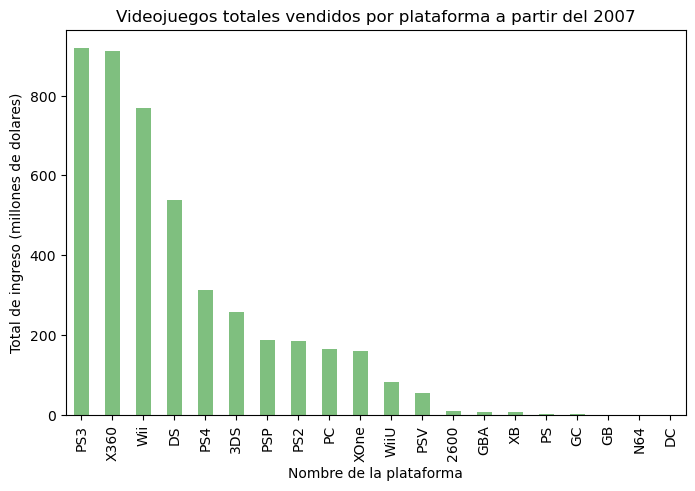

In [28]:
#Con los datos filtrados, veamos que plataformas son lideres en ventas.
top_platforms = video_games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
top_platforms.plot(kind = 'bar', 
                        title = 'Videojuegos totales vendidos por plataforma a partir del 2007', 
                        xlabel = 'Nombre de la plataforma', 
                        ylabel = 'Total de ingreso (millones de dolares)', 
                        figsize = (8,5), 
                        color = 'green', 
                        alpha = 0.5)
plt.show

Como era de esperarse, las consolas que fueron avanzando en su ciclo, aumentaron las ventas, el Play Station 3 es más reciente que el 2 y por eso es que sus ventas fueron aumentando mientras que las del 2 fueron disminuyendo, vemos que el Xbox 360 casi generó el mismo total de ventas que el PS2, otras consolas igualmente más recientes como el PSP, Xbox one, etc. fueron aumentando sus ventas. 
Dado que el Play Station 3 se estrenó en el 2006 probablemente su pico de ventas fue entre los años 2009 y 2013 y para el 2017 experimentará un declive en sus ventas, dado que debemos seleccionar plataformas rentables para la predicción del 2017, el periodo de tiempo desde el 2007 no es viable, voy a seleccionar a partir del 2013 ya que las consolas recientes experimentaran su pico de ventas en el 2017 aproximadamente y eso es lo que nos interesa.

## Filtrado de datos en base a los ultimos 3 años.

<function matplotlib.pyplot.show(close=None, block=None)>

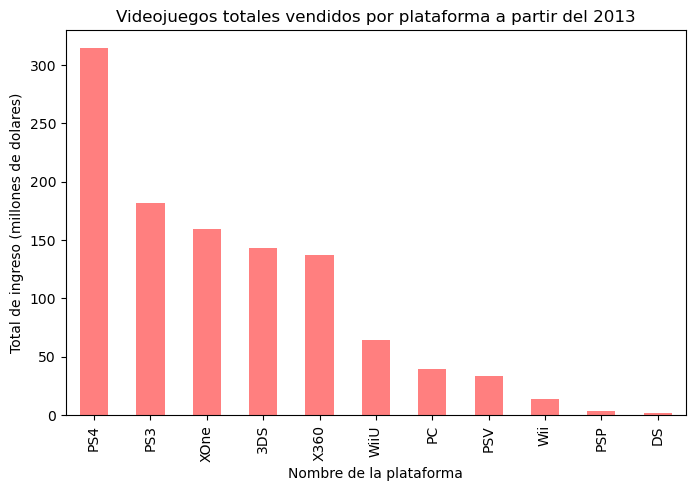

In [29]:
vg_from_2013 = video_games.query('year_of_release >= 2013')
best_platforms = vg_from_2013.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
best_platforms.plot(kind = 'bar', 
                        title = 'Videojuegos totales vendidos por plataforma a partir del 2013', 
                        xlabel = 'Nombre de la plataforma', 
                        ylabel = 'Total de ingreso (millones de dolares)', 
                        figsize = (8,5), 
                        color = 'red', 
                        alpha = 0.5)
plt.show

En la celda de arriba podemos ver como el Play Station 4 ahora es lider en ventas, este se estreno en el 2013 al igual que el Xbox one, el nintendo 3DS se estreno en el 2011, notemos que las ventas del Play Station 3 disminuyeron significativamente, las ventas del Wii, PSP y DS también disminuyeron, casi desaparecieron. Voy a seleccionar 3 plataformas potencialmente rentables: 
1. Play Station 4
2. Xbox One
3. Nintendo 3DS

Las plataformas están ordenadas conforme al nivel de rentabilidad que supongo que tienen cada una, el nintendo 3DS lo coloque al final ya que se estrenó 2 años antes que el Play y Xbox One

No seleccioné el Play Station 3 ya que como mencioné antes, está apunto de experimentar un declive en sus ventas, para el año 2017 sus ventas disminuiran mucho más, en cambio las ventas del Play Station 4 y el Xbox One estan actualmente en aumento y para el 2017 estarán comenzando su pico de ventas.

## Distribución de ventas totales desglosado por plataforma.

<function matplotlib.pyplot.show(close=None, block=None)>

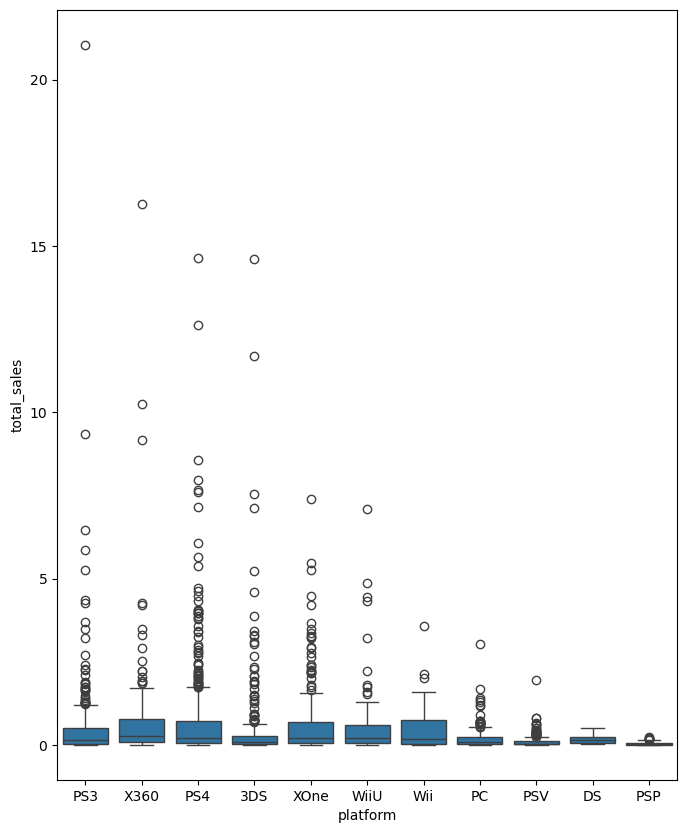

In [30]:
#Voy a crear un diagrama de caja sobre las ventas totales de las distintas plataformas.
plt.figure(figsize=(8,10 ))
sns.boxplot(x='platform', y='total_sales', data = vg_from_2013)
plt.show

En la gráfica de arriba, tenemos un diagrama de caja sobre las ventas globales para las distintas plataformas, algo interesante es que casi todas las plataformas tienen valores atípcos, de hecho, un gran número de ellos. Recordemos que los valores atípicos son aquellos que se encuentran a una distancia 1.5 veces mayor que el rango intercuartílico, es decir, (rango intercuartílico) x 1.5.

Algunas de las consolas tienen un número de ventas muy reducido, como es el caso de el PSP y el PSV, las medianas de las distintas consolas son similares nunca superan los 2 millones de dolares en ventas. Los valores mínimo y maximo varian dependiendo de la consola, en la mayoria de casos podemos ver que los datos están sesgados hacia la derecha, esto quiere decir que muchos de los datos tienden a ser mayores que la mediana lo cual es benefico ya que cada punto representa el total de ventas de un solo videojuego, vemos que algunos. Existen diferencias significativas en cuanto a las ventas, algunas consolas presentan un gran número de ventas, mientras que otras presentan un número muy pequeño de estas.

## Promedio de ventas vs Ventas totales, por plataforma.

In [31]:
#A continuación voy a obtener las ventas promedio de las distintas plataformas
mean_sales_per_platform = vg_from_2013.groupby('platform')['total_sales'].mean().reset_index()
mean_sales_per_platform.columns = ['platform', 'mean_sales']
mean_sales_per_platform

,platform,mean_sales
0,3DS,0.472772
1,DS,0.192500
2,PC,0.208624
3,PS3,0.525884
4,PS4,0.801378
5,PSP,0.052239
6,PSV,0.092151
7,Wii,0.593913
8,WiiU,0.562000
9,X360,0.735484


In [32]:
#Ahora vamos a obtener el total de ventas de estas plataformas para comparar con su promedio de ventas.
total_sales_per_platform = vg_from_2013.groupby('platform')['total_sales'].sum().reset_index()
total_sales_per_platform.columns = ['platform', 'total_sales']
total_sales_per_platform

,platform,total_sales
0,3DS,143.25
1,DS,1.54
2,PC,39.43
3,PS3,181.43
4,PS4,314.14
5,PSP,3.50
6,PSV,32.99
7,Wii,13.66
8,WiiU,64.63
9,X360,136.80


In [33]:
#Vamos a unir estos dos dataframes para poder comparar su número de ventas con el promedio de ventas, respectivamente de cada plataforma.
mean_vs_total = mean_sales_per_platform.merge(total_sales_per_platform, how = 'left', on = 'platform')
mean_vs_total

,platform,mean_sales,total_sales
0,3DS,0.472772,143.25
1,DS,0.192500,1.54
2,PC,0.208624,39.43
3,PS3,0.525884,181.43
4,PS4,0.801378,314.14
5,PSP,0.052239,3.50
6,PSV,0.092151,32.99
7,Wii,0.593913,13.66
8,WiiU,0.562000,64.63
9,X360,0.735484,136.80


En la celda de arriba hacemos una comparación entre el promedio de ventas de las consolas, y el total de ventas en millones de dolares de dichas consolas, como podemos ver la media de ventas en todos los casos es menor a un millon de dolares, lo cual me parece muy interesante, porque en la siguiente columna se observa el total de ventas, como una plataforma con un promedio de ventas menor a 500,000 dolares llega a 143 millones de dolares? hay dos opciones, la consola lanzó muchos videojuegos y por eso alcanzó esa cifra, o, hubo algunos valores atípicos que hicieron que el total de ventas alcanzara esa cifra, dado al análisis que realizamos con el diagrama de caja, podemos concluir que los valores atípicos hicieron que algunas consolas alcanzaran esos números en ventas.

Otro punto importante, es el hecho de que el Play Station 4 tiene el mayor promedio y total de ventas de todas las plataformas, el xbox one tiene números competitivos al igual que el nintendo 3DS, existen otras plataformas igualmente competitivas, pero muchas de esas fueron lanzadas en años anteriores y no tendran el mismo número de ventas en el futuro.

## ¿Cómo afectan las reseñas de usuarios y profesionales a las ventas en una plataforma popular?

### Ventas totales vs Calificación de la critica.

<function matplotlib.pyplot.show(close=None, block=None)>

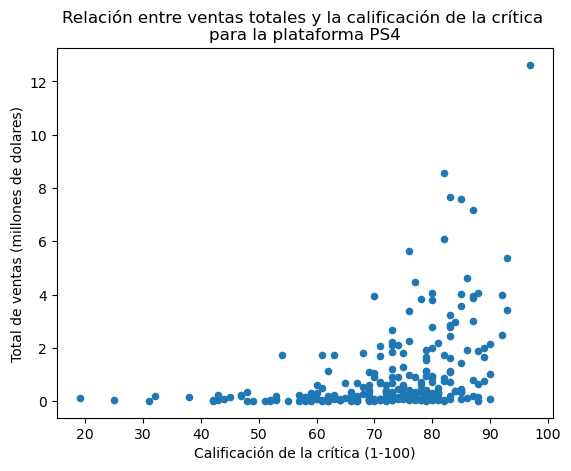

In [34]:
#Vamos a crear un gráfico de dispersión para observar la relacion entre las ventas totales y las reseñas de profesionales. 
ps4 = vg_from_2013.query('platform == "PS4"')
ps4.plot(kind = 'scatter', 
         x = 'critic_score', 
         y = 'total_sales', 
         xlabel = 'Calificación de la crítica (1-100)', 
         ylabel = 'Total de ventas (millones de dolares)', 
         title = '''Relación entre ventas totales y la calificación de la crítica 
para la plataforma PS4''')
plt.show

In [35]:
#Ahora vamos a calcular la el coeficiente de correlación entre estas dos variables.
sales_vs_critic_score = ps4['critic_score'].corr(ps4['total_sales'])
print('Coeficiente de correlación:', sales_vs_critic_score)


Coeficiente de correlación: 0.40656790206178095


Arriba podemos ver que tenemos una correlación de 0.406, esto indica una correlación positiva, lo que quiere decir que cuando una variable aumenta, la otra también, la correlación es moderada, esto indica que hay cierta tendencia creciente pero no suficientemente fuerte ni muy confiable. Esto con respecto al coeficiente.
Con respecto a la gráfica, podemos ver que los datos están bastante dispersos, hay algunos videojuegos  que alcanzan calificaciones de hasta 90 pero que no vendieron más de 1 millon de dolares. Por otro lado, tenemos videojuegos con calificaciones superiores a 95 que alcanzaron más de 12 millones en ventas.

### Ventas totales vs Calificación de los usuarios.

<function matplotlib.pyplot.show(close=None, block=None)>

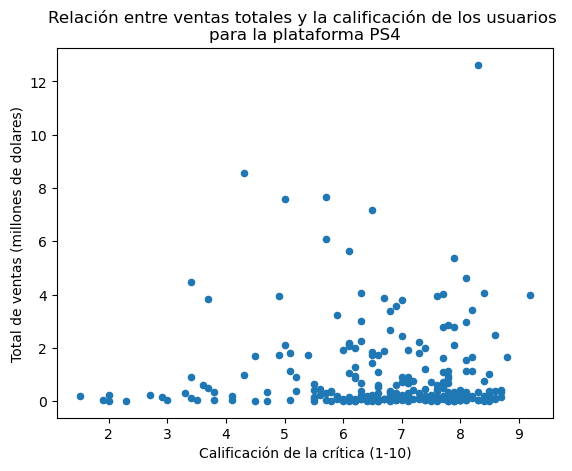

In [36]:
ps4.plot(kind = 'scatter', 
         x = 'user_score', 
         y = 'total_sales', 
         xlabel = 'Calificación de la crítica (1-10)', 
         ylabel = 'Total de ventas (millones de dolares)', 
         title = '''Relación entre ventas totales y la calificación de los usuarios 
para la plataforma PS4''')
plt.show

In [37]:
sales_vs_user_score = ps4['user_score'].corr(ps4['total_sales'])
print('Coeficiente de correlación:', sales_vs_user_score)

Coeficiente de correlación: -0.031957110204556376


En este caso podemos ver que nuestro coeficiente de correlación es negativo, esto representa que cuando una variable aumenta, la otra disminuye, esto es muy interesante ya que puede llegar a ser perjudicial, recordemos que el coeficiente de correlación no indica causalidad. El coeficiente es de 0.031 lo que indica una correlación debil. 
Al observar la gráfica notamos que igualmente los datos están bastante dispersos, existen algunos casos en los que la calificación es alta e igualmente las ventas, y otros en los que la calificación aumenta y las ventas disminuyen. 
Para los dos coeficientes que calculamos, no existe evidencia suficiente que indique una correlación fuerte, en el caso de las reseñas de usuario vs las ventas, la relación es debil.
En ambos casos existen algunos videojuegos que podemos observar que tienen tanto una buena calificación como un mayor total de ventas.

## Mismos juegos, diferentes plataformas.

<function matplotlib.pyplot.show(close=None, block=None)>

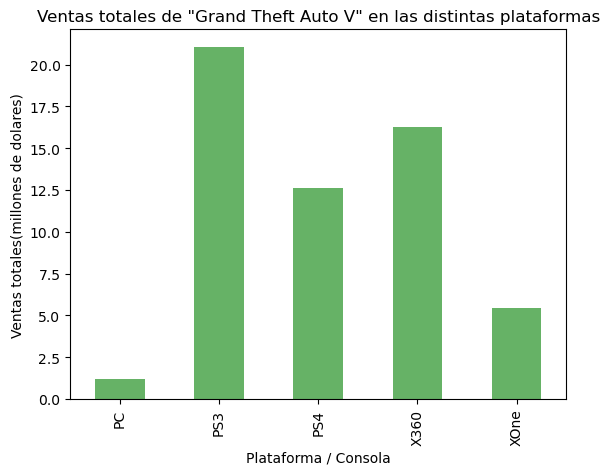

In [38]:
# Vamos a comparar las ventas de los mismos juegos pero en distintas plataformas para observar si la plataforma influye en el éxito de
# un juego.
duplicated_titles = vg_from_2013[vg_from_2013.duplicated('name', keep=False)]
sales_by_game_platform = duplicated_titles.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
#Seleccionamos el juego a comparar.
game = 'Grand Theft Auto V'
game_sales = sales_by_game_platform.query('name == @game')
game_sales.plot(kind = 'bar', x = 'platform', y = 'total_sales', xlabel = 'Plataforma / Consola', ylabel = 'Ventas totales(millones de dolares)',
                title = f'Ventas totales de "{game}" en las distintas plataformas', color = 'green', alpha = 0.6, legend = None)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

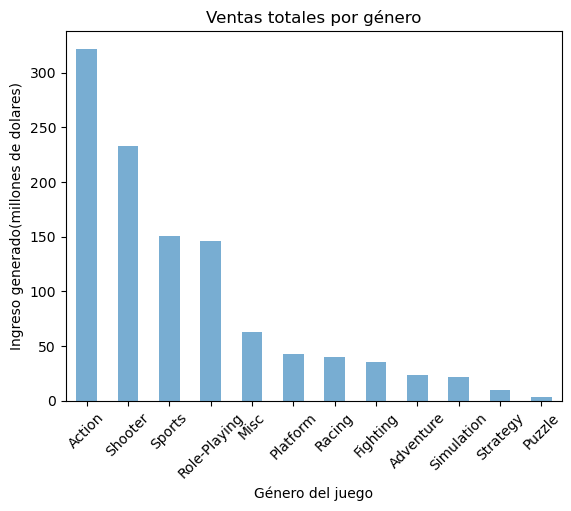

In [39]:
sales_by_genre = vg_from_2013.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
sales_by_genre.plot(kind = 'bar', 
                   title = 'Ventas totales por género', 
                   xlabel = 'Género del juego', 
                   ylabel = 'Ingreso generado(millones de dolares)',
                   rot = 45, 
                   alpha = 0.6)
plt.show

En la celda anterior podemos ver los generos que mayores ingresos generaron, recordemos que estos son datos a partir del 2013, el género más popular es el de acción, el segundo es de disparos y el tercero es de deportes. Creo que estos 3 géneros siempre serán los más populares, la gente ama la acción, los disparos y los deportes, entonces hace sentido el hecho de que estos generos de videojuegos hayan generado la mayor cantidad de ingresos. Considero que estos 3 géneros son los más rentables, sobre todo los primeros dos ya que existe una gran variedad y gama de titulos distintos, mientras que en el género de deportes, algunas sagas dominan el mercado como por ejemplo Fifa, Pro evolution soccer, NBA2k, Madden, etc.

# Perfiles de usuario por cada región.

## Perfil de usuario de Norte América.

In [40]:
#Vamos a visualizar las 5 plataformas principales en la zona de Norte América.
na_top_platforms =vg_from_2013.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
na_top_platforms

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
WiiU     29.21
PC       11.11
Wii       6.56
PSV       5.04
DS        0.57
PSP       0.00
Name: na_sales, dtype: float64

In [41]:
#Vamos a visualizar los 5 géneros principales en la zona de Norte América.
na_top_genres =vg_from_2013.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
na_top_genres

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Platform         18.14
Fighting         15.55
Racing           12.96
Adventure         7.14
Simulation        4.86
Strategy          3.28
Puzzle            0.83
Name: na_sales, dtype: float64

In [42]:
#Vamos a investigar si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
na_esrb_sales =vg_from_2013.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
na_esrb_sales

rating
M          165.21
unknown     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64

## Perfil de usuario de Europa.

In [43]:
#Vamos a visualizar las 5 plataformas principales en Europa.
eu_top_platforms =vg_from_2013.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
eu_top_platforms

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
PC       25.36
WiiU     19.85
PSV       6.10
Wii       5.93
DS        0.85
PSP       0.17
Name: eu_sales, dtype: float64

In [44]:
#Vamos a visualizar los 5 géneros principales en Europa.
eu_top_genres =vg_from_2013.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
eu_top_genres

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Misc             20.04
Platform         15.58
Simulation       10.92
Fighting          8.55
Adventure         8.25
Strategy          4.22
Puzzle            1.00
Name: eu_sales, dtype: float64

In [45]:
#Vamos a investigar si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
eu_esrb_sales =vg_from_2013.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
eu_esrb_sales

rating
M          145.32
E           83.36
unknown     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64

## Perfil de usuario de Japón.

In [46]:
#Vamos a visualizar las 5 plataformas principales en Japón.
jp_top_platforms =vg_from_2013.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
jp_top_platforms

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
PSP      3.29
X360     0.51
XOne     0.34
Wii      0.05
DS       0.00
PC       0.00
Name: jp_sales, dtype: float64

In [47]:
#Vamos a visualizar las 5 plataformas principales en Japón.
jp_top_genres =vg_from_2013.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
jp_top_genres

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Adventure        5.82
Sports           5.41
Platform         4.79
Simulation       4.52
Racing           2.30
Strategy         1.77
Puzzle           1.18
Name: jp_sales, dtype: float64

In [48]:
#Vamos a investigar si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
jp_esrb_sales =vg_from_2013.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
jp_esrb_sales

rating
unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64

En la parte de arriba, generamos un perfil de usuario para cada región (Norte américa, Europa y Japón), determinamos las plataformas más populares en la región, los géneros más populares y por último, cual es la clasificación ESRB que más ingresos generó. Podemos notar que las regiones de Europa y Norte América son relativamente similares, las 3 plataformas más populares incluyen al Play Station 4 y al Xbox one, vemos que para la región de europa, la cantidad de ingresos que generó es de 141 millones, para la segunda plataforma que más ingresos generó fue de 67 millones, es una diferencia enorme, en el caso de Norte América si hubo un "dominio" por parte del Play Station 4, sin embargo la competencia que fue el Xbox One, se encuentra a una diferencia de menos de 20 millones de dolares. 

Los géneros más populares de estas dos regiones fueron los mismos, en el mismo orden, 1. Acción, 2. Disparos, 3. Deportes, el género de acción generó más de 100 millones en las dos regiones, el género de disparos generó más de 100 millones en Norte América mientras que generó casi 90 millones en Europa. En cuanto a las clasificaciones ESRB la M (Mature) es la más popular en ambas regiones, y E(Everyone) también se encuentra entre las principales.

Podemos concluir que las preferencias de estas dos regiones son relativamente similares, para Europa, es un hecho que la plataforma más dominante y por mucho, es el Play Station 4, mientras que en Norte América, hay varias opciones de plataformas donde se puede lanzar un juego. En cuanto a los géneros y las clasificaciones son muy similares de igual manera, hablando de proporciones, etc.

Ahora vamos con Japón, Japón es un caso aparte, totalmente distinto de Europa y Norte América en todos los aspectos, los géneros más populares, las clasificaciones, las plataformas, todo, es distinto, esto puede atribuirse a que es una cultura totalmente diferente a la Europea y a la Americana. Para empezar, las plataformas, para la región de Japón podemos ver que la más popular es el Nintendo 3DS, seguido de distintas consolas de Play Station, investigando, me di cuenta de que las primeras 4 consolas en el top, son de origen Japonés, Play Station y Nintendo, en Japón, la popularidad del Xbox One es baja, en Cambio, los productos de Nintendo y Play Station se encuentran entre las principales plataformas. Siguiendo con los generos, el más popular es el de juegos de rol, seguido del de acción y misc. Cabe recalcar que las cantidades de dinero generadas por Japón, son significativamente menores a las generadas por las otras regiones, esto puede deberse a distintos factores como el tamaño de la poblacion o distintas regulaciones propias del país. Y por ultimo las clasificaciones con más ventas fueron E(Everyone), unknown y T(teen), analizando esta información, y ligandola a los generos más populares, existe una probabilidad de que la clasificación unknown sea una clasificación apta para menores. Para Japón podemos ver que las clasificaciones ESRB si afectan sus ventas, porque vemos que las clasificaciones que más ventas tuvieron fueron clasificaciones más aptas, la clasificación para mayores tuvo menos ventas.

**Conclusiones generales:*

**Perfil de usuario de Norte América:**
- Las personas prefieren plataformas como el Play Station 4 o el Xbox One, los juegos de acción, disparos y deportes son los más rentables, además las clasificaciones M tienen buena aceptación, al igual que la clasificación desconocida y E.

**Perfil de usuario de Europa:**
- Las personas prefieren ampliamente el Play Station 4, algunas llegan a preferir el Xbox One pero la diferencia es significativa. Los géneros de juegos más rentables son de acción, disparos y deportes y de igual manera la clasificación M tiene muy buena aceptación, seguido de la clasificación E y la clasificación desconocida.

**Perfil de usuario de Japón:**
- Las personas prefieren consolas o plataformas de origen japones como es el caso del Nintendo DS, Play Station 3, 4 y PSV, el Xbox One no es muy popular en japón. Los géneros más rentables son los de Juegos de rol, acción y misc, las clasificaciones más aptas para todos son las que tienen mayor aceptación.

# Pruebas de hipótesis.

A continuación vamos a realizar dos pruebas de hipótesis estadísticas para comparar las medias de distintos segmentos de información

## ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas?

In [49]:
#Prueba de hipótesis
#Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas.
#Para probar esta hipótesis tenemos que usar una brueba de dos colas, usaré la función ttest_ind para comparar la media de dos poblaciones.

#primero vamos a obtener ambas medias.
xone_users = vg_from_2013.query('platform == "XOne"')
pc_users = vg_from_2013.query('platform == "PC"')
#Ahora obtenemos las medias de ambas poblaciones, el promedio de calificaciones de los usuarios para las plataformas Xbox One y PC
xone_user_score = pd.to_numeric(xone_users['user_score'], errors='coerce').dropna()
pc_user_score = pd.to_numeric(pc_users['user_score'], errors='coerce').dropna()

#Fijamos el valor alpha a 0.05
alpha = 0.01
results_p1 = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False) 

print('valor p: ', results_p1.pvalue)

if results_p1.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.14759594013430463
No podemos rechazar la hipótesis nula


En la celda anterior realizé una prueba de hipótesis estadística para responder a la siguiente pregunta: ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas?, para ello formulamos la hipótesis nula y alternativa, la hipótesis nula plantea que entre los dos promedios de calificaciones de usuario de el Xbox One y la PC no hay cambios, mientras que la hipótesis alternativa plantea que si los hay. Realizamos una prueba de dos colas con la función scipy.stats.ttest_ind para comparar ambas medias.

El resultado de la prueba fue un valor p de 0.1475, lo cuál es mayor que el nivel de significancia o valor alpha (α) de 0.01, por lo tanto no podemos rechazar la hipótesis nula. Esto significa que no hay evidencia estadística suficiente para afirmar que las calificaciones promedio difieren entre Xbox One y PC.

## ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?

In [50]:
#Prueba de hipótesis.
#Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
#Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
#En este caso probaremos la hipótesis con una prueba de dos colas, usaré la función ttest_ind debido a que queremos comparar dos medias.

#Primero filtrarmos los dos DataFrames que necesitamos para extraer las medias.
action_df = vg_from_2013.query('genre == "Action"')
sports_df = vg_from_2013.query('genre == "Sports"')
#Ahora vamos a obtener las medias de ambas poblaciones, el promedio de calificaciones de usuario para los juegos de los géneros de acción y deportes.
action_user_score = pd.to_numeric(action_df['user_score'], errors='coerce').dropna()
sports_user_score = pd.to_numeric(sports_df['user_score'], errors='coerce').dropna()

#Fijamos el valor alpha a 0.05
alpha = 0.01
results_p2 = st.ttest_ind(action_user_score, sports_user_score, equal_var = False) 

print('valor p: ', results_p2.pvalue)

if results_p2.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  1.4460039700704315e-20
Rechazamos la hipótesis nula


Arriba realizamos nuestra segunda prueba de hipótesis en la cuál teníamos como objetivo responder a la siguiente pregunta: ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?, formulamos la hipótesis nula y alternativa, donde la hipótesis nula plantea que entre los dos promedios de calificaciones de usuario de los juegos de los géneros de Acción y Deportes no hay ninguna diferencia, es decir son iguales,  mientras que la hipótesis alternativa platea que si existen diferencias. En este caso de igual manera realizamos una prueba de dos colas usando la función scipy.stats.ttest_ind para comparar dos medias de distintas poblaciones.

El resultado de nuestra prueba fue un valor p de 1.4460039700704315e-20 (escrito con notación científica) lo cuál es un número extremadamente pequeño, obviamente menor que nuestro nivel de significación o valor alpha de 0.01. Por esto rechazamos la hipótesis nula, y concluimos que existe suficiente evidencia estadística para afirmar que las calificaciones promedio son distintas entre los juegos de acción y deportes.

# Conclusiones finales - ¿Qué hace a un videojuego exitoso?

Previamente analizamos los datos de ventas de videojuegos en distintas regiones, la razón de esto, yace en el objetivo de nuestro análisis, el cuál es determinar que cosas influyen en el éxito o fracaso de un videojuego. A continuación presento brevemente mis hallazgos.
Factores que influyen en el éxito de una plataforma: 

-La plataforma en la que se estrena: Si una plataforma es vieja o no está en tendencia el juego dificilmente será exitoso, por ejemplo si quisieras sacar un juego hoy para la plataforma NES probablemente nadie o muy pocas personas lo comprarían. La "vida" de tendencia de una platafomra es de 10 a 12 años, si estrenas un juego en los años intermedios, probablemente se generaran más ventas. Para la planificación del 2017, las plataformas más rentables son: 1. Play Station 4, 2. Xbox One, 3. Nintendo 3DS. debido a que estas platafomras experimentaran su pico de ventas en este año, están en tendencia, son de las plataformas más recientes para considerar en el 2017.

-La preferencia de los usuarios hacia una plataforma en particular: para explicar esto pondremos el ejemplo del Play Station 4 y el Xbox One, ambas plataformas fueron estrenadas en el 2013 pero las ventas y la popularidad del Play es mayor, muchas personas prefieren el Play sobre el Xbox One.

-Las calificaciones: a pesar de que nuestros coeficientes de corrleación entre las calificaciones y las ventas de juegos no eran estrictamente fuertes, sostengo que una buena calificación, reseñas y opiniones positivas de otros usuarios, pueden ayudar y beneficiar en el éxito de un videojuego, en general, considero que la calificación de la critica tiene un peso mayor e influye más en el exito de un juego que las calificaciones de los usuarios.

-Las distintas plataformas para un mismo juego: comprobamos que las ventas de un videojuego varian de una plataforma a otra, es una buena idea lanzar un mismo videojuego en distintas plataformas, por supuesto estas plataformas tienen que ser rentables, como ya lo mencionamos anteriormente.

-El género del videojuego: El género del videojuego es un factor muy determinante, ya que si elegimos un género que muy pocas personas juegan, seguramente no tendremos muchas ventas, por el contrario si seleccionamos algún género en tendencia, nuestras ventas probablemente serán mayores. Encontramos que los géneros de videojuego más rentable son los de acción, disparos y deportes. Esto varia dependiendo de la región, a continuación lo especificaré.

-El lugar o región en el que se estrena el videojuego: Considero que este es uno de los factores más importantes a la hora de decidir lanzar un videojuego, el tener en cuenta a los usuarios, el cliente. Los usuarios de Europa y Norte América son bastante parecidos, encontramos que a los europeos les gusta mucho más el Play Station 4 que el Xbox One, mientras que a los Norte Americanos les atraen ambas platafomras, un poco más el Play. En estas dos regiones las clasificaciones M tienen buena aceptación. Los géneros más rentables en estas regiones son de acción, disparos y deportes. Por otro lado  tenemos a Japón, un caso aparte, los usuarios de aquí prefieren otro tipo de videjuegos, los géneros más rentables son: 1. Role-Playing, 2. Action, 3. Misc. Las platafomras preferidas son las originarias de este lugar, como el Nintendo 3DS, Play Station, PSV, etc. En este lugar las clasificaciones con mayor aceptación son las que son aptas para más gente, si lanzas un videojuego con clasificación M o M+18 probablemente no tendrá demasiadas ventas debido a la cultura del país.

-Estadísticamente, encontramos que los promedios de calificación para distintas medias, son distintos, en el caso de el género de acción y deportes, son similares en el caso de las plataformas Xbox One y PC, esto ultimo probablemente es debido a que muchas de las personas que utilizan Xbox pasan su cuenta y datos de usuario a laptops o computadoras de escritorio, debido a que estas cuentan con sistema operativo de Microsoft, pueden conectarse bien.

Entonces, recapitulando y concluyendo, ¿qué hace a un videojuego exitoso? Un ejemplo de videojuego exitoso para 2017 sería lanzado en Play Station 4 y Xbox One(Al mismo tiempo en PC), sería del género acción, su clasificación sería M y conseguiría buenas calificaciones de la crítica. Este videojuego sería lanzado con mayor publicidad en Norte América y Europa, mientras que en Japón no tanto. En europa las campañas publicitarias serían más enfocadas al Play Station 4, mientras que en Norte América serían un poco más diversas.